smoke vs charges


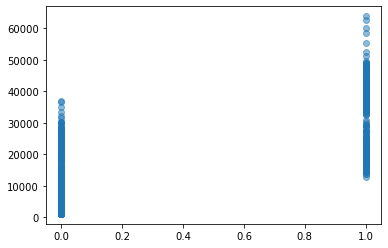

obese vs charges


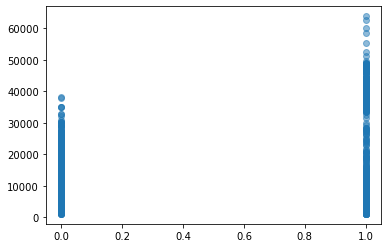

age vs charges


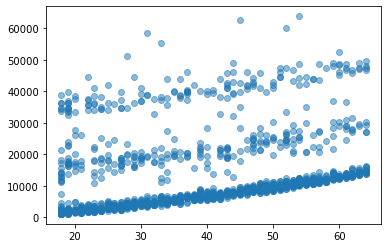

children vs charges


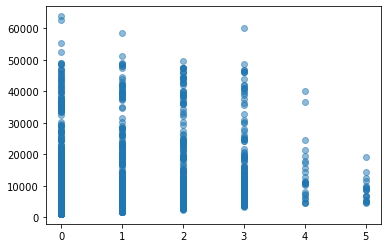

checking corelation between feautures
              age   charges     obese     smoke
age      1.000000  0.299008  0.086764 -0.025019
charges  0.299008  1.000000  0.199683  0.787251
obese    0.086764  0.199683  1.000000 -0.001381
smoke   -0.025019  0.787251 -0.001381  1.000000
Linear Regression Prediction Score - 0.7756367245551543
RMSE: 5632.09
XGBoost Prediction Score - 0.8533672877997747
   age  obese  smoke
0   31      1      1
predcit insurance premium cost - 
[44429.395]


In [2]:
import numpy as np 
import pandas as pd
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import tree, linear_model
from sklearn import model_selection
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
import xgboost
data = pd.read_csv("insurance.csv")
#print (data)
Obesity=[]
def BmiToBinaryData(data):
    for row in data["bmi"]:
        if(row > 30):
            Obesity.append(1)
        else:
            Obesity.append(0)
    return Obesity

smoke=[]
def SmokerToBinaryData(data):
    for row in data["smoker"]:
        if(row=="yes"):
            smoke.append(1)
        else:
            smoke.append(0)
    return smoke
    

data["obese"]=BmiToBinaryData(data)
data = data.drop('bmi', 1)
data["smoke"]=SmokerToBinaryData(data)
data = data.drop('smoker', 1)



y=data["charges"]
for x in ["smoke","obese","age","children"]:
    print (x + " vs " + "charges")
    plt.scatter(data[x],y , alpha=0.5)
    plt.show()

data = data.drop('sex', 1)
data = data.drop('region', 1)
data = data.drop('children', 1)
print ("checking corelation between feautures")
print(data.corr())

x = data.drop('charges',1)
y = data["charges"]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y ,test_size=0.2,random_state=9)



regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
regr.predict(x_test)
print("Linear Regression Prediction Score - " + str(regr.score(x_test,y_test)))
print("RMSE: %.2f" % math.sqrt(np.mean((regr.predict(x_test) - y_test) ** 2)))


xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
traindf, testdf = train_test_split(x_train, test_size = 0.3)
xgb.fit(x_train,y_train)
predictions = xgb.predict(x_test)
print("XGBoost Prediction Score - " + str(xgb.score(x_test,y_test)))

d = {'age': [31], 'obese': [1], 'smoke':[1]}
df = pd.DataFrame(data=d)
print (df)
print("predcit insurance premium cost - ")
print(xgb.predict(df))